In [192]:
import numpy as np
import matplotlib.pyplot as plt

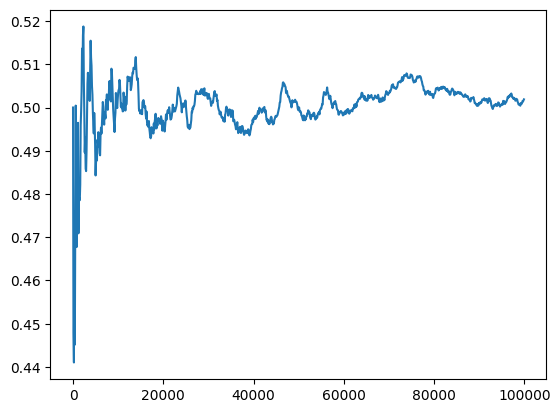

In [193]:
states = [0, 1]
actions = [0, 1]
costCoef = 5
p = 0.01
Q = [[[10, 10], [10, 10]]]
N = 100000
mu = [np.ones(len(states)) / len(states)]
phi = 50
tol_q = 0.1
tol_mu = 0.01
om_q = 0.55
om_mu = 0.85
gamma = 0.5

# calculate rhos based on running count of 
# how many times a state-action pair has happened and 
# the constants omega_Q and omega_Mu
def rhosCalc (count_xa, n):
    rhoQ = 1 / np.pow(1 + count_xa, om_q)
    rhoMu = 1 / np.pow(2 + n, om_mu)
    return { 'q': rhoQ, 'mu': rhoMu }

# given a state, action, and mu,
# find the new state (markovian dynamics),
# and calculate the cost function
def env (state, action, mu):
    newS = state
    if np.random.random() < p:
        newS = (state + action) % 2
    else:
        newS = (state + action - 1) % 2
    return { "newState": newS,  "cost": state + mu[0] }

# using the formula, calculate softmin probabilities
# and choose an action given the pmf probabilities
def softminAct (Q_x):
    sum = 0
    weights = np.zeros(len(actions))
    for a in range(len(actions)):
        weights[a] = np.exp(-phi * Q_x[a])
        sum += weights[a]
    weights = weights / sum
    return np.random.choice(actions, p = weights)

# initialize count for finding rho_Q (learning rate)
count = np.zeros([2, 2])

# randomly choose initial state based on initial mu
x = np.random.choice(states, p = mu[0])

# iterate N times
for n in range(N):

    # copy new Q matrix, mu distribution
    Q.append(np.copy(Q[n]))
    mu.append(np.copy(mu[n]))

    # use softmin to choose next action
    a = softminAct(Q[n + 1][x])

    # update counter for rho calculation
    count[x][a] += 1
    rhos = rhosCalc(count[x][a], n)

    # input state, action, mu into environment
    # and receive new state and cost
    envir = env(x, a, mu[n + 1])

    # update Q matrix, current state, mu distribution
    Q[n][x][a] += rhos['q'] * (envir["cost"] + gamma * np.min(Q[n][envir["newState"]]) - Q[n][x][a])
    x = envir["newState"]
    delta_X_n = np.zeros(len(states))
    delta_X_n[x] = 1
    mu[n + 1] += rhos['mu'] * (delta_X_n - mu[n])

# my visualization of it hopefully converging lol
abridgedmu = []
for i in range(0, N, 100):
    abridgedmu.append(mu[i][0])

%matplotlib inline

plt.plot(list(range(0, N, 100)), abridgedmu)